## $V_B^-$ coupled to three nitrogen nuclear spins via Fermi contact

In [1]:
from qutip import *
from matplotlib.pyplot import figure
from scipy.signal import argrelextrema
import numpy as np
import time
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:
#Nuclear Spins
N = 3
spin = 1

Ix = spin_Jx(1)
Iy = spin_Jy(1)
Iz = spin_Jz(1)
iden = identity(3)

In [4]:
#Electron Spins
Sx, Sy, Sz = sigmax(), sigmay(), sigmaz()

In [5]:
# zero field splitting
Dzfs = 2*np.pi*3.471e9

# gyromagnetic ratios
gammae = 2*np.pi*2.79925e10
gammaN = 2*np.pi*3.078e6

# background magnetic field
# B0 = 0.33e-3

# # Fermi contact hyperfine coupling
# Ahf_xx = 2*np.pi*np.array([80.219, 46.110, 80.202])*1e6
# Ahf_yy = 2*np.pi*np.array([57.486, 91.571, 57.479])*1e6
# Ahf_zz = 2*np.pi*np.array([47.957, 47.935, 47.935])*1e6
# Ahf_xy = 2*np.pi*np.array([19.687, -0.004, -19.687])*1e6

# Fermi contact hyperfine coupling
Ahf_xx = 2*np.pi*np.array([ 79.406, 46.944, 79.406])*1e6
Ahf_yy = 2*np.pi*np.array([ 58.170, 90.025, 58.170])*1e6
Ahf_zz = 2*np.pi*np.array([ 48.159, 48.158, 48.159])*1e6
Ahf_xy = 2*np.pi*np.array([ 18.391, 0.000, -18.391])*1e6

# Normalization
units = 2*np.pi*1e6
De = Dzfs/units
ge = gammae/units
gN = gammaN/units

Axx = Ahf_xx/units
Ayy = Ahf_yy/units
Azz = Ahf_zz/units
Axy = Ahf_xy/units

A_perp = (Axx + Ayy)/(2*np.sqrt(2))
B_perp = (Axx - Ayy)/(2*np.sqrt(2))

AA = [Axx, Ayy, Azz, Axy, A_perp, B_perp]

In [6]:
#interaction operators
SIxx = [tensor(Sx,Ix,iden,iden),tensor(Sx,iden,Ix,iden),tensor(Sx,iden,iden,Ix)]
SIyy = [tensor(Sy,Iy,iden,iden),tensor(Sy,iden,Iy,iden),tensor(Sy,iden,iden,Iy)]
SIzz = [tensor(Sz,Iz,iden,iden),tensor(Sz,iden,Iz,iden),tensor(Sz,iden,iden,Iz)]
SIxy = [tensor(Sx,Iy,iden,iden),tensor(Sx,iden,Iy,iden),tensor(Sx,iden,iden,Iy)]
SIyx = [tensor(Sy,Ix,iden,iden),tensor(Sy,iden,Ix,iden),tensor(Sy,iden,iden,Ix)]

In [7]:
#initial state
#electron state
ket0 = basis(2,0)
ket1 = basis(2,1)
xp = (ket0 + ket1)/np.sqrt(2)
xm = (ket0 - ket1)/np.sqrt(2)
rho_ep = xp*xp.dag()
rho_em = xm*xm.dag()

#set rubik state
ket_z = basis(3,1)
ket_x = (basis(3,0) - basis(3,2))/np.sqrt(2)
ket_y = (basis(3,0) + basis(3,2))/np.sqrt(2)

#initial nuclear
rho_n1 = ket_z*ket_z.dag()
rho_n = tensor(rho_n1,rho_n1,rho_n1) # |zzz>

#initial state
rho_0 = tensor(rho_ep,rho_n) # |+x>|zzz>

#projective measurement
Pqz_xp = tensor(xp*xp.dag(),iden,iden,iden)
Pqz_xm = tensor(xm*xm.dag(),iden,iden,iden)

In [8]:
#projection in rubik states
P_z = ket_z*ket_z.dag()
P_x = ket_x*ket_x.dag()
P_y = ket_y*ket_y.dag()

P_xy = P_x + P_y
P_zx = P_z + P_x
P_yz = P_y + P_z

X_xy = ket_x*ket_y.dag() + ket_y*ket_x.dag()
X_zx = ket_z*ket_x.dag() + ket_x*ket_z.dag()
X_yz = ket_y*ket_z.dag() + ket_z*ket_y.dag()

Y_xy = (1j)*ket_x*ket_y.dag() - (1j)*ket_y*ket_x.dag()
Y_zx = (1j)*ket_z*ket_x.dag() - (1j)*ket_x*ket_z.dag()
Y_yz = (1j)*ket_y*ket_z.dag() - (1j)*ket_z*ket_y.dag()

Z_xy = ket_x*ket_x.dag() - ket_y*ket_y.dag()
Z_zx = ket_z*ket_z.dag() - ket_x*ket_x.dag()
Z_yz = ket_y*ket_y.dag() - ket_z*ket_z.dag()

Xc_xy = tensor(X_xy,X_xy,X_xy)
Xc_zx = tensor(X_zx,X_zx,X_zx)
Xc_yz = tensor(X_yz,X_yz,X_yz)

Yc_xy = tensor(Y_xy,Y_xy,Y_xy)
Yc_zx = tensor(Y_zx,Y_zx,Y_zx)
Yc_yz = tensor(Y_yz,Y_yz,Y_yz)

Zc_xy = tensor(Z_xy,Z_xy,Z_xy)
Zc_zx = tensor(Z_zx,Z_zx,Z_zx)
Zc_yz = tensor(Z_yz,Z_yz,Z_yz)

#rotating in Z
U_z1 = tensor(P_z - P_xy,P_z - P_xy,P_z - P_xy) #pi rotation
U_z2 = tensor(P_z + (1j)*X_xy,P_z + (1j)*X_xy,P_z + (1j)*X_xy) #pi over 2 
U_z4 = tensor(P_z + (P_xy + (1j)*X_xy)/np.sqrt(2),P_z + (P_xy + (1j)*X_xy)/np.sqrt(2),P_z + (P_xy + (1j)*X_xy)/np.sqrt(2)) #pi over 4

E_z2 = (U_z2 + U_z2.dag())/2
O_z2 = (U_z2 - U_z2.dag())/2
E_z4 = (U_z4 + U_z4.dag())/2
O_z4 = (U_z4 - U_z4.dag())/2

#rotating in X
U_x1 = tensor(P_x - P_yz,P_x - P_yz,P_x - P_yz) #pi rotation
U_x2 = tensor(P_x + (1j)*X_yz,P_x + (1j)*X_yz,P_x + (1j)*X_yz) #pi over 2 
U_x4 = tensor(P_x + (P_yz + (1j)*X_yz)/np.sqrt(2),P_x + (P_yz + (1j)*X_yz)/np.sqrt(2),P_x + (P_yz + (1j)*X_yz)/np.sqrt(2)) #pi over 4

E_x2 = (U_x2 + U_x2.dag())/2
O_x2 = (U_x2 - U_x2.dag())/2
E_x4 = (U_x4 + U_x4.dag())/2
O_x4 = (U_x4 - U_x4.dag())/2

#rotating in Y
U_y1 = tensor(P_y - P_zx,P_y - P_zx,P_y - P_zx) #pi rotation
U_y2 = tensor(P_y + (1j)*Y_zx,P_y + (1j)*Y_zx,P_y + (1j)*Y_zx) #pi over 2 
U_y4 = tensor(P_y + (P_zx + (1j)*Y_zx)/np.sqrt(2),P_y + (P_zx + (1j)*Y_zx)/np.sqrt(2),P_y + (P_zx + (1j)*Y_zx)/np.sqrt(2)) #pi over 4

E_y2 = (U_z2 + U_z2.dag())/2
O_y2 = (U_z2 - U_z2.dag())/2
E_y4 = (U_z4 + U_z4.dag())/2
O_y4 = (U_z4 - U_z4.dag())/2

In [9]:
#target state: X*rho0
rho_targ = Xc_yz*rho_n*Xc_yz

In [10]:
#simple test
U_ent = tensor(rho_ep,U_x2) + tensor(rho_em,U_x2.dag()) #tensor(rho_ep,-1j*Xc_yz) + tensor(rho_em,(1j*Xc_yz).dag())
rho_ztest = (U_ent*rho_0*U_ent.dag()).unit()
fidelity(rho_targ,rho_ztest.ptrace([1,2,3]))

1.0000000104764422

In [11]:
N_rev = 20 #revolution rotation, will change to N_alpha in mitigation  but do we need that in I_z? maybe no

#B for a given phi and revolution N
def Bop(phi,N):
    B = (4*N*A_perp.mean()/phi + De + 0.5*Azz.mean())/(ge-gN)
    # B = (4*N*A_perp.mean()/phi + De - 0.5*Azz.mean())/(ge+gN)
    return B
    
# testing part
#B0 = 125.614e-3 # Delta ~ A
#B0 = 200e-3 # fast Delta Sigma
#B0 = 124.84038e-3 # Sigma << Delta

# off_set = 0 #N_rev/2
# B0 = Bop(np.pi/2,N_rev+off_set) #B from pi/4, given N_rev to have max at t = N_rev*T_p , in Tesla

A_perp = (Axx + Ayy)/(2*np.sqrt(2))
B_perp = (Axx - Ayy)/(2*np.sqrt(2))
# w0 = ge*B0 - De
# wn = gN*B0
# w = np.array([wn,wn,wn]) - 0.5*Azz
# Delta = np.array([w0,w0,w0]) - w
# Sigma = np.array([w0,w0,w0]) + w
# p = 5
# T_p = p*(2*np.pi/Delta.mean())
# tau = T_p/4

In [12]:
def Fx(t,T_p):
    tau = T_p/4
    t_m = (t/T_p - t//T_p)*T_p # remnent in the period  
    t_check = np.array([t_m<=3*tau,t_m>tau])
    if t_check.all():  #t_m<=3*tau and t_m>tau:
        return -1
    else: 
        return 1

def Fy(t,T_p):
    tau = T_p/4
    t_m = (t/T_p - t//T_p)*T_p # remnent in the period  
    t_check = np.array([t_m<=3*tau,t_m>tau])
    # if all(t_check):  #t_m<=3*tau and t_m>tau:
    #     return -1
    # else: 
    #     return 1
    return 1

def Fz(t,T_p):  
    tau = T_p/4
    t_m = (t/T_p - t//T_p)*T_p # remnent in the period  
    t_check = np.array([t_m<=3*tau,t_m>tau])
    if t_check.all():  #t_m<=3*tau and t_m>tau:
        return -1
    else: 
        return 1

In [13]:
#Effective Hamiltonian
def H_exact_B(t,B0,p):
    Axx = AA[0]
    Ayy = AA[1]
    Azz = AA[2]
    Axy = AA[3]

    # w0 = ge*B0 - De
    # wn = gN*B0
    # w = np.array([wn,wn,wn]) - 0.5*Azz
    # Delta = np.array([w0,w0,w0]) - w
    # Sigma = np.array([w0,w0,w0]) + w
    # T_p = p*(2*np.pi/Delta.mean())
    
    w0 = De - ge*B0 
    wn = gN*B0
    w = np.array([wn,wn,wn]) + 0.5*Azz
    Delta = np.array([w0,w0,w0]) - w
    Sigma = np.array([w0,w0,w0]) + w
    T_p = p*(2*np.pi/np.abs(Delta.mean()))
    
    Hz = 0
    for k in range(3):
        Hz += Fz(t,T_p)*Azz[k]*SIzz[k]/2

    #rotating terms
    H_Delta = 0
    for k in range(3):
        H_Delta += A_perp[k]*np.cos(Delta[k]*t)*(Fx(t,T_p)*SIxx[k] + Fy(t,T_p)*SIyy[k]) #A_perp[k]*(SIxx[k]) 
        H_Delta -= A_perp[k]*np.sin(Delta[k]*t)*(Fx(t,T_p)*SIxy[k] - Fy(t,T_p)*SIyx[k])

    #counter rotating terms
    H_Sigma = 0
    for k in range(3):
        H_Sigma += B_perp[k]*np.cos(Sigma[k]*t)*(Fx(t,T_p)*SIxx[k] - Fy(t,T_p)*SIyy[k])
        H_Sigma += B_perp[k]*np.sin(Sigma[k]*t)*(Fy(t,T_p)*SIyx[k] + Fx(t,T_p)*SIxy[k])
        H_Sigma -= Axy[k]*np.sin(Sigma[k]*t)*(Fx(t,T_p)*SIxx[k] - Fy(t,T_p)*SIyy[k])/(2*np.sqrt(2))
        H_Sigma += Axy[k]*np.cos(Sigma[k]*t)*(Fx(t,T_p)*SIxy[k] + Fy(t,T_p)*SIyx[k])/(2*np.sqrt(2))

    #control style
    H_C = 0
    # for k in range(3):
    #     H_C += fy(t)*tensor(Sy,iden,iden,iden)
    
    H = Hz + H_Delta + H_Sigma + H_C

    return H

In [14]:
N_rev = [10,20,30,40,50] #N_rev = [5,10,15,20,25]
Blist = [Bop(np.pi/4,N) for N in N_rev]

p = 5
# T_p_max = p*(2*np.pi/((ge*np.max(Blist) - De) - gN*np.max(Blist) + 0.5*Azz.mean()))
T_p_max = p*(2*np.pi/((ge*np.max(Blist) - De) - gN*np.max(Blist) - 0.5*Azz.mean()))
M = 5000
fold = 1.25
M_ref = int(M//fold)
tlist = np.linspace(0, fold*np.max(N_rev)*T_p_max, M+1) 

#fidelity
# fidel = np.zeros(shape=[len(Blist),len(tlist)])
fidel_exact = np.zeros(shape=[len(Blist),len(tlist)])

H_element = (P_yz + (1j)*X_yz)/np.sqrt(2)
H_yz = tensor(H_element,H_element,H_element)
cP_yz = tensor(qeye(2),P_yz,P_yz,P_yz)
projx_P_yz = tensor(rho_em,P_yz,P_yz,P_yz)
# oper_targ = cP_yz*tensor(rho_em,H_yz)*cP_yz
oper_targ = tensor(rho_em,H_yz)


for k in range(len(Blist)):
    B0 = Blist[k]
    def H_exact(t):
        return H_exact_B(t,B0,p)

    prop_exact = propagator(QobjEvo(H_exact),tlist)
    
    for j in range(len(tlist)):
        # prop_exact[j] = projx_P_yz*prop_exact[j]*projx_P_yz
        prop_exact[j] = prop_exact[j]*projx_P_yz
    
    for j in range(len(tlist)):
        fidel_exact[k,j] = average_gate_fidelity(prop_exact[j], oper_targ)/average_gate_fidelity(oper_targ, oper_targ)

In [15]:
N_rev = [10,20,30,40,50]
Blist = [Bop(np.pi/4,N) for N in N_rev]

def Tp(B0):
    return p*(2*np.pi/((ge*B0 - De) - gN*B0 - 0.5*Azz.mean()))

Tplist = [Tp(B0) for B0 in Blist]
Tplist

[0.012700513076812772,
 0.006350256538406389,
 0.004233504358937591,
 0.003175128269203194,
 0.0025401026153625554]

In [16]:
tmaxlist = [Tplist[k]*N_rev[k]*Azz.mean()/2 for k in range(len(Blist))]
tmaxlist

[3.058198878809337,
 3.058198878809338,
 3.0581988788093377,
 3.058198878809338,
 3.058198878809338]

In [17]:
N_rev

[10, 20, 30, 40, 50]

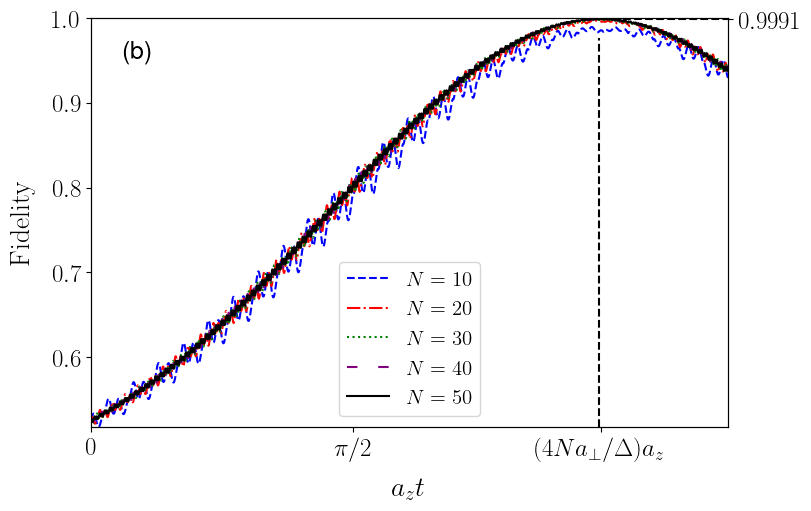

In [18]:
# N_rev = [5,10,15,20,25]
Blist = [Bop(np.pi/4,N) for N in N_rev]
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

CR = ['b','r','g','purple','k']
CS = ['--', '-.', ':',(0, (5, 10)),'-']

line = [[] for k in range(len(Blist))]
# line[0], = axis.plot(tlist*Azz.mean()/2, fidel[:], 'b', lw=1, label=r"Ideal")
for k in range(len(Blist)):
    # line[k], = axis.plot(tlist*Azz.mean()/2, fidel_exact[k,:], CR[k], ls=CS[k], lw=1.5, label=r"$B = $ "+str(int(Blist[k]*1e3))+r" mT, $N$ = "+str(int(N_rev[k])))
    line[k], = axis.plot(tlist*Azz.mean()/2, fidel_exact[k,:], CR[k], ls=CS[k], lw=1.5, label=r"$N = "+str(int(N_rev[k]))+"$")

max_list = [np.around(np.max(fidel_exact[k]),decimals=4) for k in [4]]
max_list_lab = [r'$'+str(ylab)+'$' for ylab in max_list]
# max_list = [np.around(np.max(fidel_exact[:,M]),decimals=4)]

axis.set_xlabel(r'$a_zt~$', fontsize=20, labelpad=10)
# axis.set_xticks(np.array([0,np.pi/2,np.pi,np.max(tlist)*Azz.mean()/2]),[r'$0$',r'$\pi/2$',r'$\pi$',str(np.around(np.max(tlist)*Azz.mean()/2,decimals=3))], fontsize=15)
axis.set_xticks(np.array([0,np.pi/2,tlist[M_ref]*Azz.mean()/2]),[r'$0$',r'$\pi/2$',r'$(4Na_\perp/\Delta)a_z$'], fontsize=18)
axis.set_ylabel(r'$\rm Fidelity$', fontsize=20, labelpad=40)
# axis.set_yticks(max_list,max_list, fontsize=12)
axis.set_yticks(max_list,max_list_lab, fontsize=18)
axis.autoscale(enable=True, axis='x', tight=True)
# axis.legend(handles=line, fontsize=15, loc='upper left', bbox_to_anchor=(0.1, 0.97))
axis.legend(handles=line, fontsize=15, loc='lower center')

# t_ref = tlist[M_ref]*Azz.mean()/2
t_ref = tlist[np.argmax(fidel_exact[4])]*Azz.mean()/2
F_max = np.max(fidel_exact[1])-0.045
axis.axvline(x=t_ref, ymin = 0, ymax = F_max, color='k', linestyle='--')
for k in [4]:
    axis.axhline(y = np.max(fidel_exact[k]), xmin = tlist[M_ref]/np.max(tlist), xmax = 1, color='k', linestyle='--')


#axis.yaxis.set_label_position("right")
# axis.set_yscale('log')
# axis.yaxis.tick_right()

axis2 = axis.twinx()
axis2.yaxis.tick_left()
axis.yaxis.tick_right()

ylist = [np.around(k/10,decimals=1) for k in range(1,11)]
ylist_lab = [r'$'+str(ylab)+'$' for ylab in ylist]
axis2.set_yticks(ylist, ylist_lab, fontsize=18)

axis.set_ylim(np.min(fidel_exact), 1)
axis2.set_ylim(np.min(fidel_exact), 1)

axis.text(0.05, 0.90, r'(b)',transform=axis.transAxes,size=18)

plt.savefig('Fig4b_Fidelity_Hadamard-zy-axis.pdf',bbox_inches='tight')


In [19]:
tlist[M_ref]*1e3/(2*np.pi)

20.2134943597801

In [20]:
np.abs(tlist[M_ref]-tlist[np.argmax(fidel_exact[4])])*Azz.mean()/2

0.012232795515237751

In [21]:
tlist[1]*Azz.mean()/2

0.0007645497197023345

In [22]:
M_ref

4000

In [23]:
np.argmax(fidel_exact[4])

3984

In [24]:
np.max(fidel_exact)

0.9991019202047269

In [25]:
B0

0.5667517780240725

In [26]:
np.max(tlist)

0.1587564134601597

In [22]:
N_rev = [10*(k+1) for k in range(10)]
Blist = [Bop(np.pi/4,N) for N in N_rev]
plist = [2*k + 1 for k in range(16)]

T_p_max = np.max(plist)*(2*np.pi/((ge*np.max(Blist) - De) - gN*np.max(Blist) + 0.5*Azz.mean()))
M = 100
fold = 1
tlist = np.linspace(0, fold*np.max(N_rev)*T_p_max, M+1) 

#fidelity
fidel_max = np.zeros(shape=[len(plist),len(Blist)])
fidel_temp = np.zeros(shape=[len(tlist)])

H_element = (P_yz + (1j)*X_yz)/np.sqrt(2)
H_yz = tensor(H_element,H_element,H_element)
cP_yz = tensor(qeye(2),P_yz,P_yz,P_yz)
projx_P_yz = tensor(rho_em,P_yz,P_yz,P_yz)
# oper_targ = cP_yz*tensor(rho_em,H_yz)*cP_yz
oper_targ = tensor(rho_em,H_yz)

for k in range(len(Blist)):
    B0 = Blist[k]
    for l in range(len(plist)):
        p0 = plist[l]
        def H_exact(t):
            return H_exact_B(t,B0,p0)
    
        prop_exact = propagator(QobjEvo(H_exact),tlist)
        
        for j in range(len(tlist)):
            # prop_exact[j] = projx_P_yz*prop_exact[j]*projx_P_yz
            prop_exact[j] = prop_exact[j]*projx_P_yz
            fidel_temp[j] = average_gate_fidelity(prop_exact[j], oper_targ)/average_gate_fidelity(oper_targ, oper_targ)
        
        fidel_max[l,k] = np.max(fidel_temp)

In [23]:
import pickle
pickle.dump(fidel_max, open("Fidelity_Hadamard-zy-axis_vary-N-and-p", "wb"))

In [31]:
import pickle
fidel_max = pickle.load(open("Fidelity_Hadamard-zy-axis_vary-N-and-p", "rb"))

N_rev = [10*(k+1) for k in range(10)]
Blist = [Bop(np.pi/4,N) for N in N_rev]
plist = [2*k + 1 for k in range(16)]

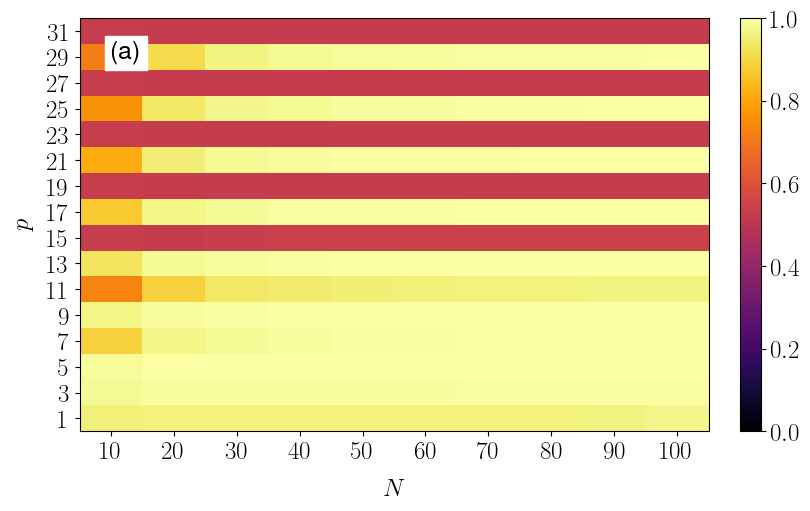

In [34]:
N_rev = [10*(k+1) for k in range(10)]
# import prettyplotlib as ppl
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

p = axis.pcolormesh(fidel_max, vmin = 0, vmax = 1, cmap = 'inferno')
cbar = fig.colorbar(p)
cbar.ax.tick_params(labelsize=18)

axis.set_xticks([k+0.5 for k in range(len(N_rev))],[r'$'+str(N)+'$' for N in N_rev], fontsize=18)
axis.set_xlabel(r'$N$', fontsize=18, labelpad=10)
axis.set_yticks([k+0.5 for k in range(len(plist))],[r'$'+str(p)+'$' for p in plist], fontsize=18)
axis.set_ylabel(r'$p$', fontsize=18, labelpad=10)

# axis.plot([np.argmax(fidel_max)//len(N_rev)+0.5,np.argmax(fidel_max)%len(N_rev)+0.5],'ko', markersize=15, lw=2)
# y = [np.argmax(fidel_max)//len(N_rev)+0.5]
# x = [np.argmax(fidel_max)%len(N_rev)+0.5] 
# plt.scatter(x, y, c ="blue", linewidths = 2,  marker ="o", s = 50)

# axis.set_ylim(0,7)
# axis.set_xlim(0,7)
# axis.set_zlim(0,1)

axis.text(0.05, 0.90, r'(a)',transform=axis.transAxes,size=18,backgroundcolor='white')

plt.savefig('Fig4a_Fidelity_Hadamard-zy-axis_vary-N-and-p.pdf',bbox_inches='tight')

In [35]:
Bop(np.pi/2,200)

1.0086321194985324